****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

In [2]:
#df1 = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#df2 = pd.read_csv('5_minutes_WDO_2018-08-31_2018-08-31.csv')
#df3 = pd.read_csv('WDO_2018-09-03_2018-09-28.csv')

#frames = [df1, df2, df3]
#result = pd.concat(frames)

#data_frame = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#data_frame = pd.read_csv('WDO_2018-08-01_2018-08-31.csv')
data_frame = pd.read_csv('WDO_2018-07-02_2019-01-24.csv')
#data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-24.csv')
#data_frame = pd.read_csv('WDO_2018-07-02_2018-09-28.csv')
#data_frame = result

In [3]:
data_frame.count()

Start                     34213
End                       34213
NegociatedOffersAmount    34213
TotalTradedQuantity       34213
RSIIndicator              34213
SMAIndicator              34213
EMAIndicator              34213
UpperBollingerBand        34213
LowerBollingerBand        34213
MiddleBollingerBand       34213
MACD                      34213
AroonIndicator            34213
NormalizedClosePrice      34213
NormalizedOpenPrice       34213
BuySignal                 34213
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.3728115043989127

In [5]:
train_y = data_frame['BuySignal']
train_x = data_frame.drop(['BuySignal'], axis=1)

In [6]:
train_x.count()

Start                     34213
End                       34213
NegociatedOffersAmount    34213
TotalTradedQuantity       34213
RSIIndicator              34213
SMAIndicator              34213
EMAIndicator              34213
UpperBollingerBand        34213
LowerBollingerBand        34213
MiddleBollingerBand       34213
MACD                      34213
AroonIndicator            34213
NormalizedClosePrice      34213
NormalizedOpenPrice       34213
dtype: int64

In [7]:
#data_frame["TotalTradedQuantity"].head()
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicator,EMAIndicator,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonIndicator,NormalizedClosePrice,NormalizedOpenPrice,BuySignal
0,7/2/18 9:43:00 AM,7/2/18 9:44:00 AM,1975,4549,0.694444,2.200000,-26801.176275,7.687648,-3.287648,2.200000,2443.412082,33.333333,0.648649,0.810811,0
1,7/2/18 9:44:00 AM,7/2/18 9:45:00 AM,2167,4911,0.540541,3.300000,-26868.341741,8.548129,-1.948129,3.300000,2449.535429,26.666667,0.594595,0.648649,1
2,7/2/18 9:45:00 AM,7/2/18 9:46:00 AM,1368,3233,0.486486,1.766667,-26928.424023,7.096725,-3.563392,1.766667,2455.013016,-73.333333,0.675676,0.594595,1
3,7/2/18 9:46:00 AM,7/2/18 9:47:00 AM,1526,4013,0.538462,0.866667,-26981.871020,5.986190,-4.252857,0.866667,2459.885677,-73.333333,0.729730,0.675676,0
4,7/2/18 9:47:00 AM,7/2/18 9:48:00 AM,541,1713,0.560976,2.533333,-27027.324643,7.336110,-2.269444,2.533333,2464.029597,-73.333333,0.638889,0.729730,0


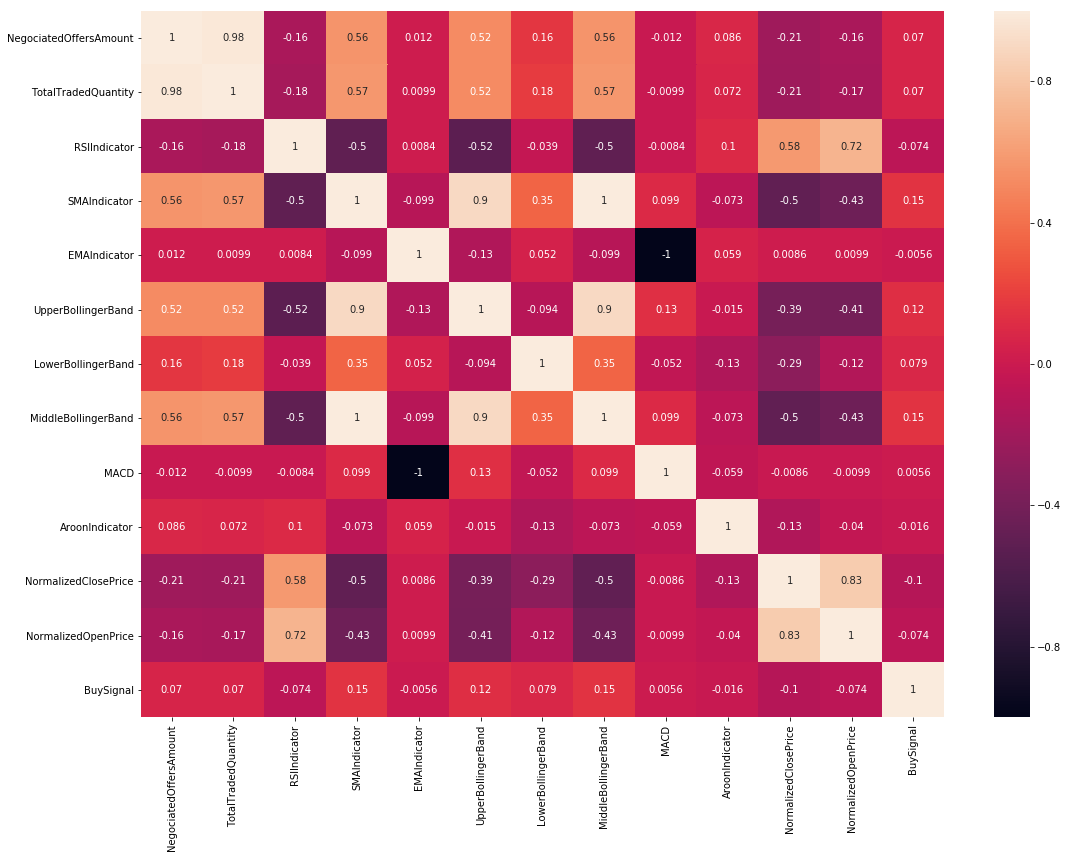

In [8]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
y_train = data_frame["BuySignal"]
x_train = data_frame.drop(["BuySignal", "Start", "End"], axis=1)
#x_train = data_frame.drop(["BuySignal", "Start", "End", "NormalizedClosePrice", "NormalizedOpenPrice", "NormalizedMediumPrice","NormalizedFirstTradePrice", "NormalizedMaxBuyOffer", "NormalizedMinSellOffer" ], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicator,EMAIndicator,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonIndicator,NormalizedClosePrice,NormalizedOpenPrice
0,1975,4549,0.694444,2.200000,-26801.176275,7.687648,-3.287648,2.200000,2443.412082,33.333333,0.648649,0.810811
1,2167,4911,0.540541,3.300000,-26868.341741,8.548129,-1.948129,3.300000,2449.535429,26.666667,0.594595,0.648649
2,1368,3233,0.486486,1.766667,-26928.424023,7.096725,-3.563392,1.766667,2455.013016,-73.333333,0.675676,0.594595
3,1526,4013,0.538462,0.866667,-26981.871020,5.986190,-4.252857,0.866667,2459.885677,-73.333333,0.729730,0.675676
4,541,1713,0.560976,2.533333,-27027.324643,7.336110,-2.269444,2.533333,2464.029597,-73.333333,0.638889,0.729730


In [11]:
#x_train["NegociatedOffersAmount"].apply(np.log)
#x_train["TotalTradedQuantity"].apply(np.log)
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicator,EMAIndicator,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonIndicator,NormalizedClosePrice,NormalizedOpenPrice
0,7.588324,8.422663,0.694444,2.200000,-26801.176275,7.687648,-3.287648,2.200000,2443.412082,33.333333,0.648649,0.810811
1,7.681099,8.499233,0.540541,3.300000,-26868.341741,8.548129,-1.948129,3.300000,2449.535429,26.666667,0.594595,0.648649
2,7.221105,8.081166,0.486486,1.766667,-26928.424023,7.096725,-3.563392,1.766667,2455.013016,-73.333333,0.675676,0.594595
3,7.330405,8.297294,0.538462,0.866667,-26981.871020,5.986190,-4.252857,0.866667,2459.885677,-73.333333,0.729730,0.675676
4,6.293419,7.446001,0.560976,2.533333,-27027.324643,7.336110,-2.269444,2.533333,2464.029597,-73.333333,0.638889,0.729730


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicator,EMAIndicator,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonIndicator,NormalizedClosePrice,NormalizedOpenPrice
0,0.827871,0.800623,0.738326,0.078031,0.393291,0.145078,0.542897,0.078031,0.606709,0.678571,0.707617,0.810811
1,0.837992,0.807902,0.569743,0.117647,0.383402,0.162252,0.580011,0.117647,0.616598,0.642857,0.648649,0.648649
2,0.787808,0.768162,0.510533,0.062425,0.374557,0.133284,0.535257,0.062425,0.625443,0.107143,0.737101,0.594595
3,0.799732,0.788706,0.567465,0.030012,0.366688,0.111120,0.516154,0.030012,0.633312,0.107143,0.796069,0.675676
4,0.686599,0.707786,0.592127,0.090036,0.359996,0.138062,0.571108,0.090036,0.640004,0.107143,0.696970,0.729730


In [13]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
cross_val_score(mlp, x_train, y_train, scoring = 'balanced_accuracy', cv=10)

array([0.50309243, 0.50300771, 0.50164153, 0.53475811, 0.51253918,
       0.5143892 , 0.52157265, 0.5046273 , 0.50783765, 0.50439874])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

log_reg = LogisticRegression(C=1000)
#svc = LinearSVC(C=100, max_iter=1000000)

print(cross_val_score(log_reg, x_train, y_train, scoring = 'balanced_accuracy', cv=5))
#print(cross_val_score(svc, x_train, y_train, scoring = 'balanced_accuracy', cv=5))

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.50909129 0.51541476 0.52428748 0.51196491 0.51150891]


/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
minRange = 0
maxRange = 34000
newMlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
newMlp.fit(x_train[minRange:maxRange], y_train[minRange:maxRange])
y_predict = newMlp.predict(x_train[maxRange:])

from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_train[maxRange:], y_predict))

newLogReg = LogisticRegression(C=1000)
newLogReg.fit(x_train[:maxRange], y_train[:maxRange])
y_predict = newLogReg.predict(x_train[maxRange:])
print(balanced_accuracy_score(y_train[maxRange:], y_predict))

#newSvc = LinearSVC(C=100, max_iter=1000000)
#newSvc.fit(x_train[:maxRange], y_train[:maxRange])
#y_predict = newSvc.predict(x_train[maxRange:])
#print(balanced_accuracy_score(y_train[maxRange:], y_predict))


0.5388405797101449
0.526231884057971


/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
data_frame.to_csv('all-data-ever.csv')

In [18]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)


select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]

mlp = MLPClassifier(hidden_layer_sizes=[100])
scores = cross_val_score(mlp, X_train_selected, y_train, scoring = 'balanced_accuracy')

scores

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.51065076, 0.51287329, 0.50193954])

In [19]:
columns_with_support

array(['RSIIndicator', 'SMAIndicator', 'UpperBollingerBand',
       'LowerBollingerBand', 'MiddleBollingerBand',
       'NormalizedClosePrice'], dtype=object)

In [20]:
columns_without_support = columns[np.invert(support)]
columns_without_support

array(['NegociatedOffersAmount', 'TotalTradedQuantity', 'EMAIndicator',
       'MACD', 'AroonIndicator', 'NormalizedOpenPrice'], dtype=object)

In [21]:
log_reg = LogisticRegression(C=1000)

print(cross_val_score(log_reg, X_train_selected, y_train, scoring = 'balanced_accuracy'))

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.5098636  0.52227325 0.50929849]


/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print ('Univariate Statistics: Columns selected')
print(columns_with_support)
print ('Univariate Statistics: Columns without support')
print(columns_without_support)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]
columns_without_support = columns[np.invert(support)]

Univariate Statistics: Columns selected
['RSIIndicator' 'SMAIndicator' 'UpperBollingerBand' 'LowerBollingerBand'
 'MiddleBollingerBand' 'NormalizedClosePrice']
Univariate Statistics: Columns without support
['NegociatedOffersAmount' 'TotalTradedQuantity' 'EMAIndicator' 'MACD'
 'AroonIndicator' 'NormalizedOpenPrice']


In [23]:
print ('Model-Based Feature Selection: Columns selected')
print(columns_with_support)
print ('Model-Based Feature Selection: Columns without support')
print(columns_without_support)

Model-Based Feature Selection: Columns selected
['NegociatedOffersAmount' 'TotalTradedQuantity' 'RSIIndicator'
 'UpperBollingerBand' 'LowerBollingerBand' 'MACD']
Model-Based Feature Selection: Columns without support
['SMAIndicator' 'EMAIndicator' 'MiddleBollingerBand' 'AroonIndicator'
 'NormalizedClosePrice' 'NormalizedOpenPrice']
